In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as disp

import itertools
import os

In [ ]:
def generate_sinusoidal(A=1.0, w=1.0, phi=0.0, c=0.0, x_shift=0.0, N=25, plot=True):
    # Generate a curve of form y = A*sin(w*x + phi) + c for N x values linearly spaced in [0 + shift, 2*pi + shift]
    
    x = np.linspace(0 + x_shift, 2*np.pi + x_shift, N)
    y = A*np.sin(w*x + phi) + c

    if plot:
        # Plot a smooth line for visualisation.
        x_ = np.linspace(0 + x_shift, 2*np.pi + x_shift, 500)
        y_ = A*np.sin(w*x_ + phi) + c
        plt.plot(x_, y_)
        
        # Plot data.
        plt.scatter(x, y)
    
    return x, y

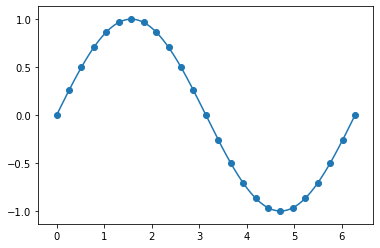

In [ ]:
x, y = generate_sinusoidal(A=1.0, w=1.0, phi=0.0, x_shift=0.0, c=0.0, plot=True)

In [ ]:
def generate_data(A_s, w_s, phi_s, c_s, x_shifts, plot=True, title="Generated Curves"):
    # Generate the curves based on all the combinations of A_s, w_s, phi_s, c_s, x_shifts.

    prod = itertools.product(A_s, w_s, phi_s, c_s)

    plt.figure(figsize=(25, 10), dpi=70)
    arrdict = dict()

    for idx, (A, w, phi, c) in enumerate(prod):
        x, y = generate_sinusoidal(A=A, w=w, phi=phi, c=c, x_shift=x_shifts[idx], plot=True)
        xname = "x_{}".format(idx)
        yname = "y_{}".format(idx)
        arrdict[xname] = x
        arrdict[yname] = y
    
    if plot:
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("y")
    
    return arrdict

In [ ]:
def generate_and_save_datasets(data_root="./data"):

    # Make directory.
    data_root_realpath = os.path.realpath(data_root)
    if not os.path.exists(data_root_realpath):
        os.makedirs(data_root_realpath)

    # Meta-train dataset.

    A_s = (0.2, 1.0, 2.5, 5.0)
    w_s = (0.25*np.pi, 1.0, 3.0*np.pi)
    phi_s = (-0.5*np.pi, 1.0, 2.0*np.pi)
    c_s = (-2.0, 0.0, 4.0)

    np.random.seed(12345)
    n_combs = len(A_s) * len(w_s) * len(phi_s) * len(c_s)
    x_shifts = np.random.randn(n_combs) * 2*np.pi

    arrdict = generate_data(A_s, w_s, phi_s, c_s, x_shifts, plot=True, title="Generated Curves: Meta-train")

    data_path_meta_train = os.path.realpath(os.path.join(data_root, "data_curves_meta-train.npz"))
    np.savez(data_path_meta_train, **arrdict)

    # Meta-test dataset.

    A_s = (0.8, 4.3)
    w_s = (0.5*np.pi, 1.3*np.pi, 2.3*np.pi)
    phi_s = (-0.3*np.pi, 1.2*np.pi, 4.3*np.pi)
    c_s = (-1.5, 2.0)

    np.random.seed(54321)
    n_combs = len(A_s) * len(w_s) * len(phi_s) * len(c_s)
    x_shifts = np.random.randn(n_combs) * 2*np.pi

    arrdict = generate_data(A_s, w_s, phi_s, c_s, x_shifts, plot=True, title="Generated Curves: Meta-test")

    data_path_meta_test = os.path.realpath(os.path.join(data_root, "data_curves_meta-test.npz"))
    np.savez(data_path_meta_test, **arrdict)
    
    return data_path_meta_train, data_path_meta_test

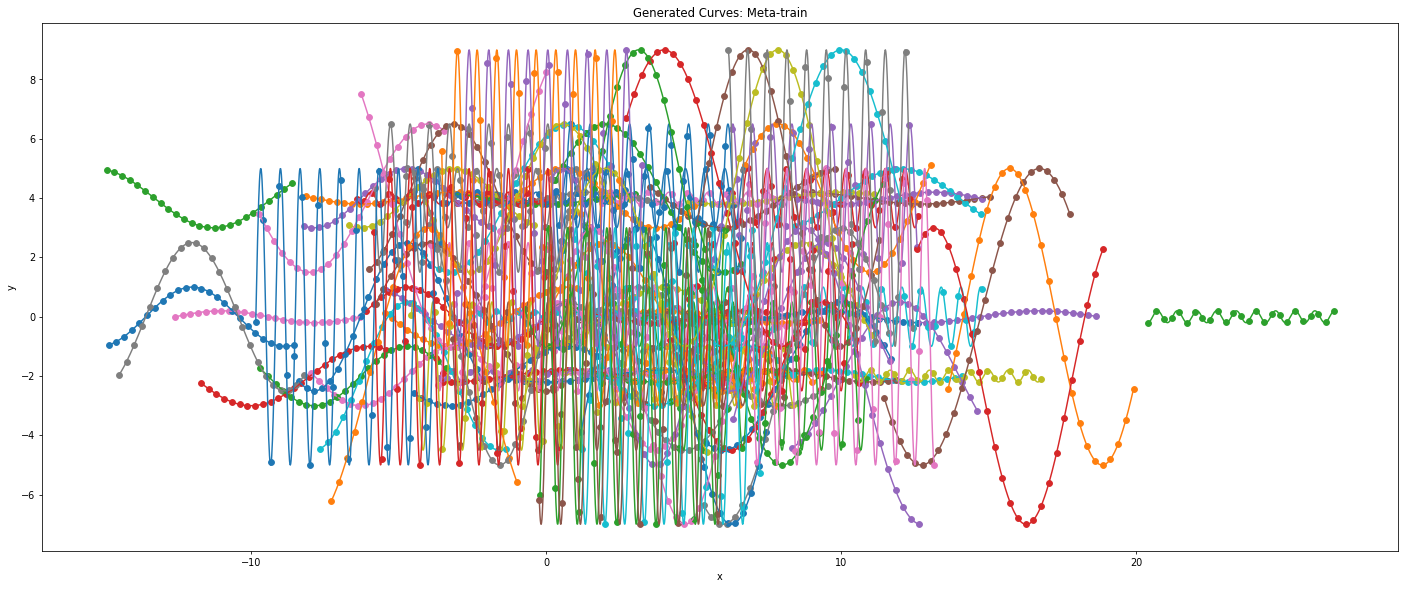

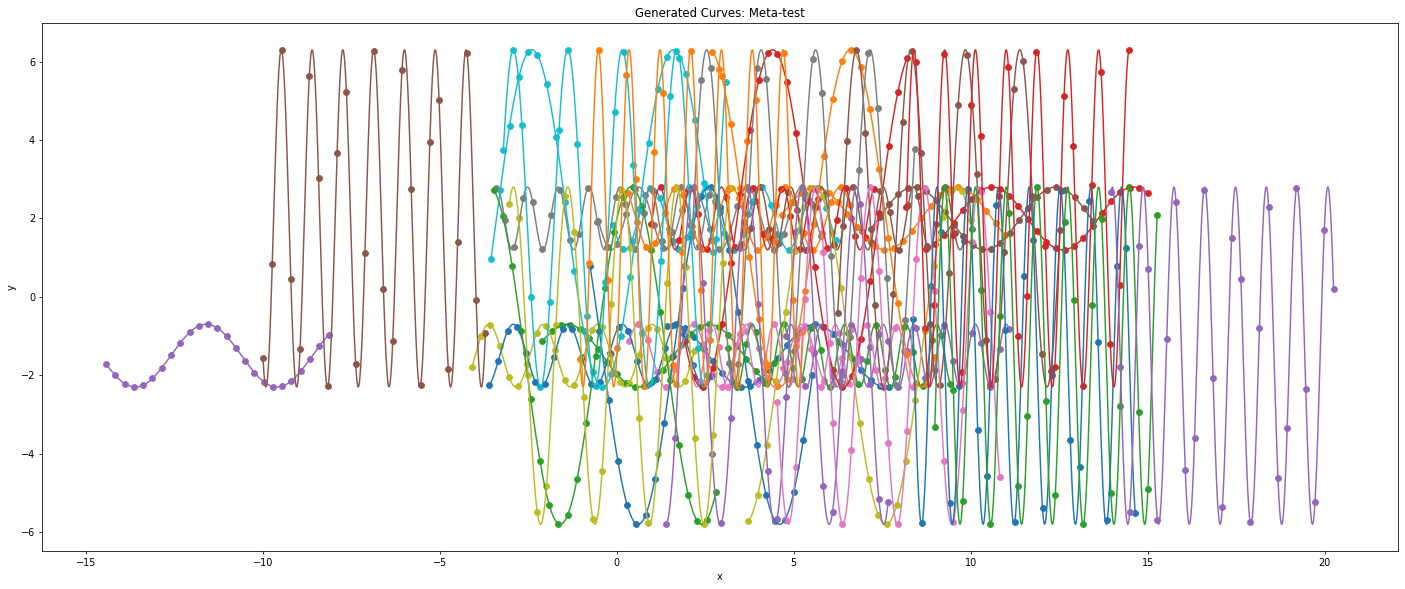

In [ ]:
# Generate and save the dataasets.
data_path_meta_train, data_path_meta_test = generate_and_save_datasets()

In [ ]:
def load_data(data_path):
    data = np.load(data_path)
    names = data.files
    l = len(names) // 2
    x, y = dict(), dict()
    for idx in range(l):
        x_key = "x_{}".format(idx)
        y_key = "y_{}".format(idx)
        x[idx] = data[x_key]
        y[idx] = data[y_key]
    return x, y

In [ ]:
# Check data loads in correctly.

x, y = load_data(data_path_meta_train)
print("Meta-train:")
print("len(x) = {}".format(len(x)))
print("len(y) = {}".format(len(y)))
print("@ key 3:\nx={}, y={}\n".format(x[3], y[3]))

x, y = load_data(data_path_meta_test)
print("Meta-test:")
print("len(x) = {}".format(len(x)))
print("len(y) = {}".format(len(y)))
print("@ key 3:\nx={}, y={}\n".format(x[3], y[3]))

Meta-train:
len(x) = 108
len(y) = 108
@ key 3:
x=[-3.49175648 -3.2299571  -2.96815771 -2.70635832 -2.44455893 -2.18275954
 -1.92096016 -1.65916077 -1.39736138 -1.13556199 -0.87376261 -0.61196322
 -0.35016383 -0.08836444  0.17343495  0.43523433  0.69703372  0.95883311
  1.2206325   1.48243189  1.74423127  2.00603066  2.26783005  2.52962944
  2.79142882], y=[-2.19706178 -2.19988445 -2.19428609 -2.18050254 -2.15911452 -2.13102308
 -2.0974117  -2.05969641 -2.01946615 -1.97841578 -1.93827475 -1.90073417
 -1.86737561 -1.83960445 -1.81859068 -1.80521959 -1.80005451 -1.80331303
 -1.81485787 -1.83420266 -1.86053242 -1.89273787 -1.92946222 -1.9691583
 -2.01015372]

Meta-test:
len(x) = 36
len(y) = 36
@ key 3:
x=[ 8.72842201  8.9902214   9.25202079  9.51382018  9.77561957 10.03741895
 10.29921834 10.56101773 10.82281712 11.0846165  11.34641589 11.60821528
 11.87001467 12.13181406 12.39361344 12.65541283 12.91721222 13.17901161
 13.44081099 13.70261038 13.96440977 14.22620916 14.48800855 14.7498079